<a href="https://colab.research.google.com/github/SeptaNanda/PCVK_Genap_2021/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import component
from google.colab import files
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
#looping data images di google drive
tumour_images=[]
for name in glob.glob('/content/drive/MyDrive/Citra_UAS/images/*.jpg'): 
  image = cv2.imread(name)
  image = cv2.resize(image,(240,240))
  tumour_images.append(image)

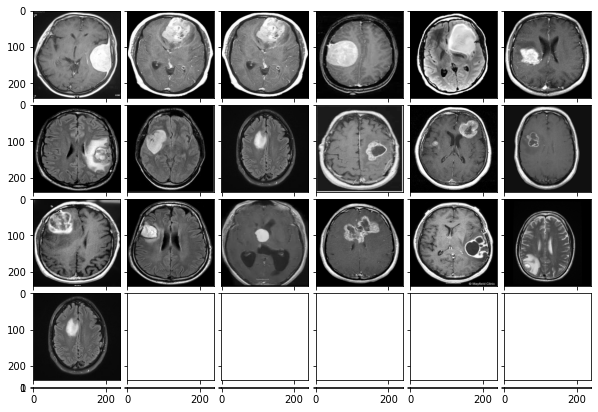

In [4]:
#menampikan images dengan grid 5 baris 6 kolom
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 6),  axes_pad=0.1,   )
for ax, im in zip(grid, tumour_images[0:30]):
    ax.imshow(im)
plt.show()

In [5]:
# for fn in glob.glob('/content/drive/MyDrive/Citra_UAS/images/*.jpg'):
#   im_gray = cv2.imread(fn, 0)
#   (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#   thresh = 127
#   im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY) [1]
#   cv2_imshow(im_bw)

In [6]:
# for fn in glob.glob('/content/drive/MyDrive/Citra_UAS/images/*.jpg'):
#   im_gray = cv2.imread(fn, 0)
#   (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#   thresh = 127
#   im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY_INV) [1]
#   cv2_imshow(im_bw)

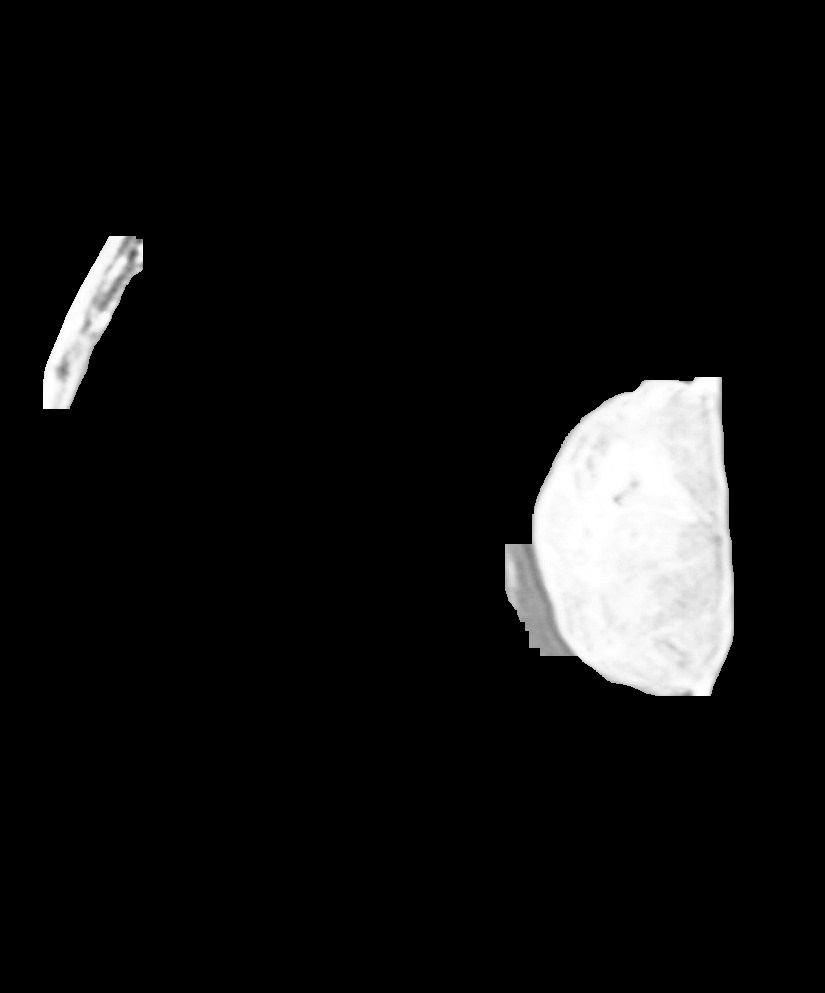

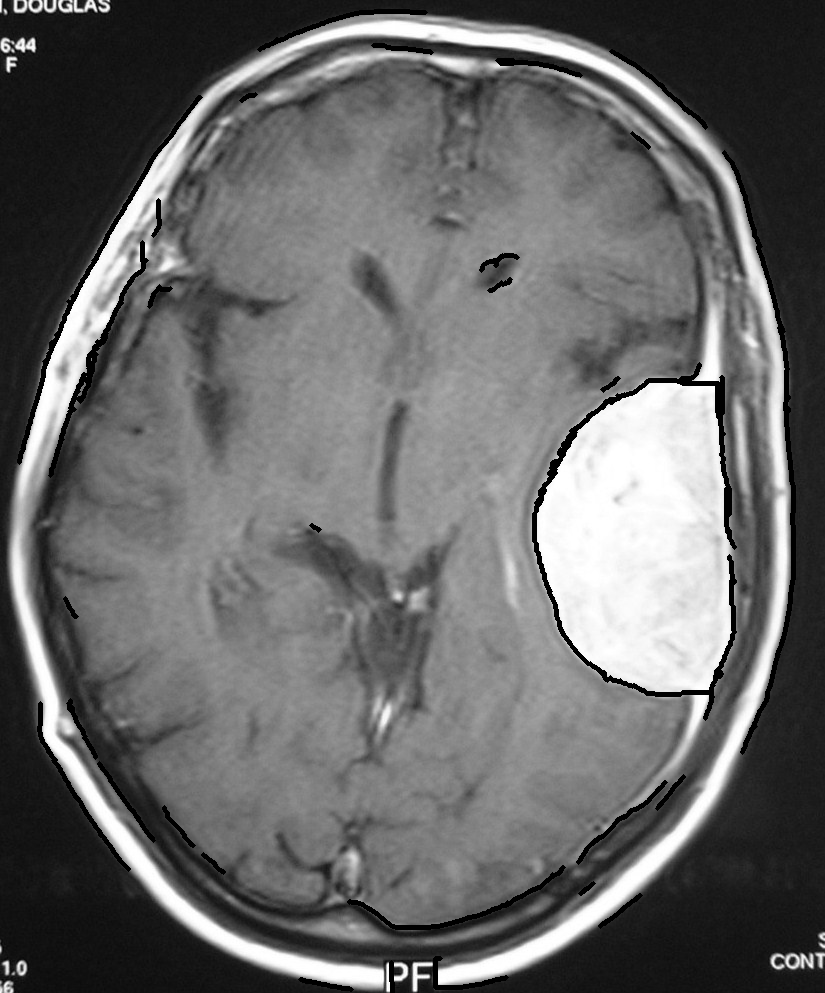

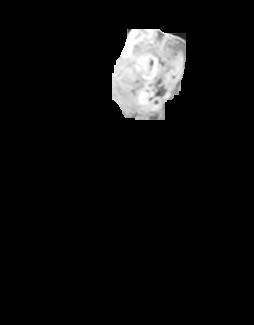

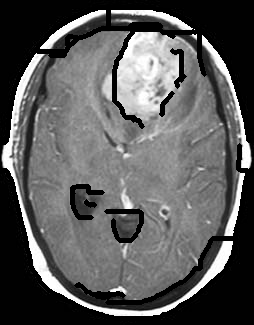

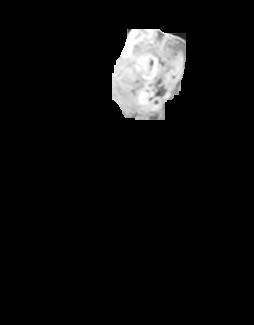

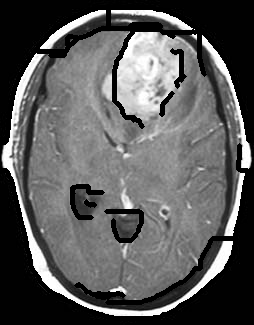

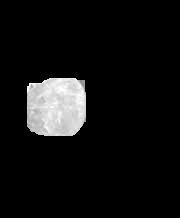

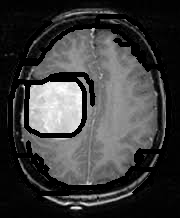

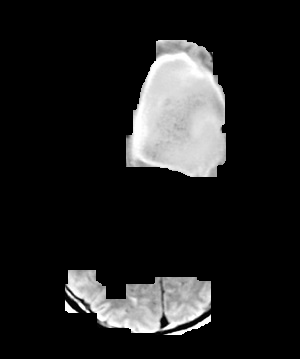

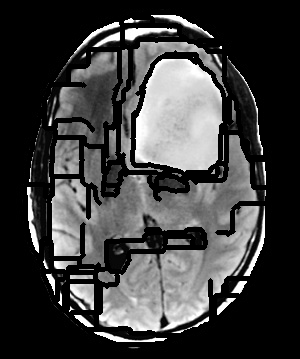

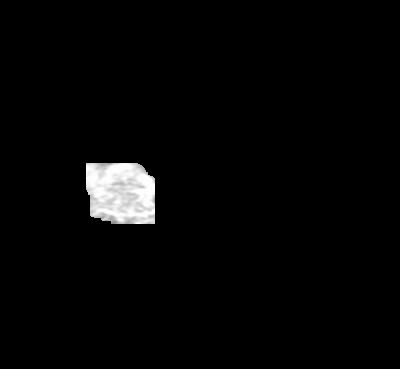

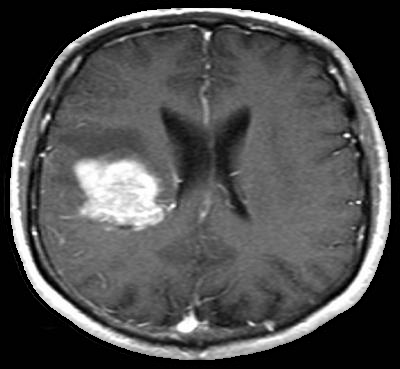

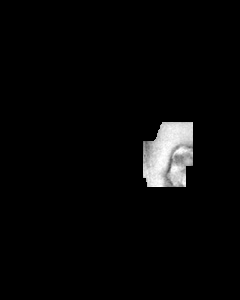

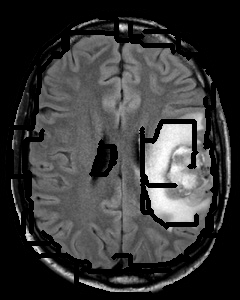

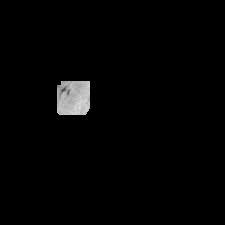

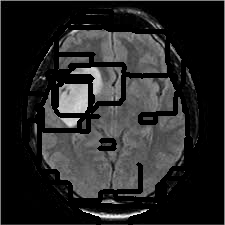

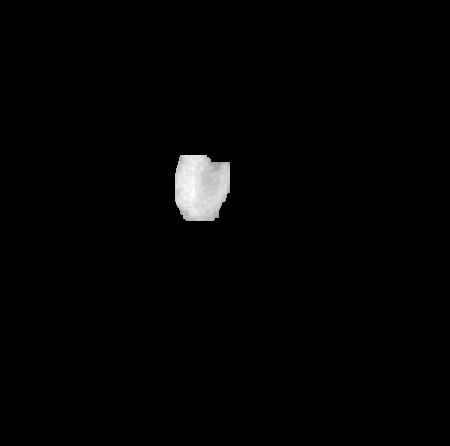

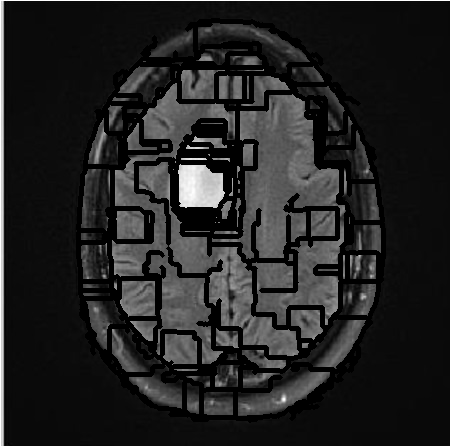

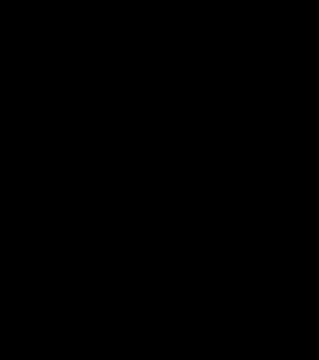

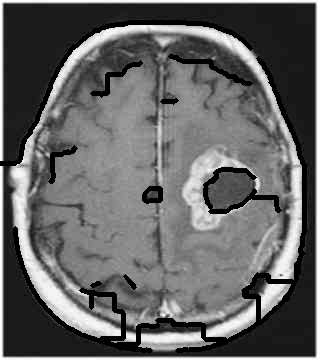

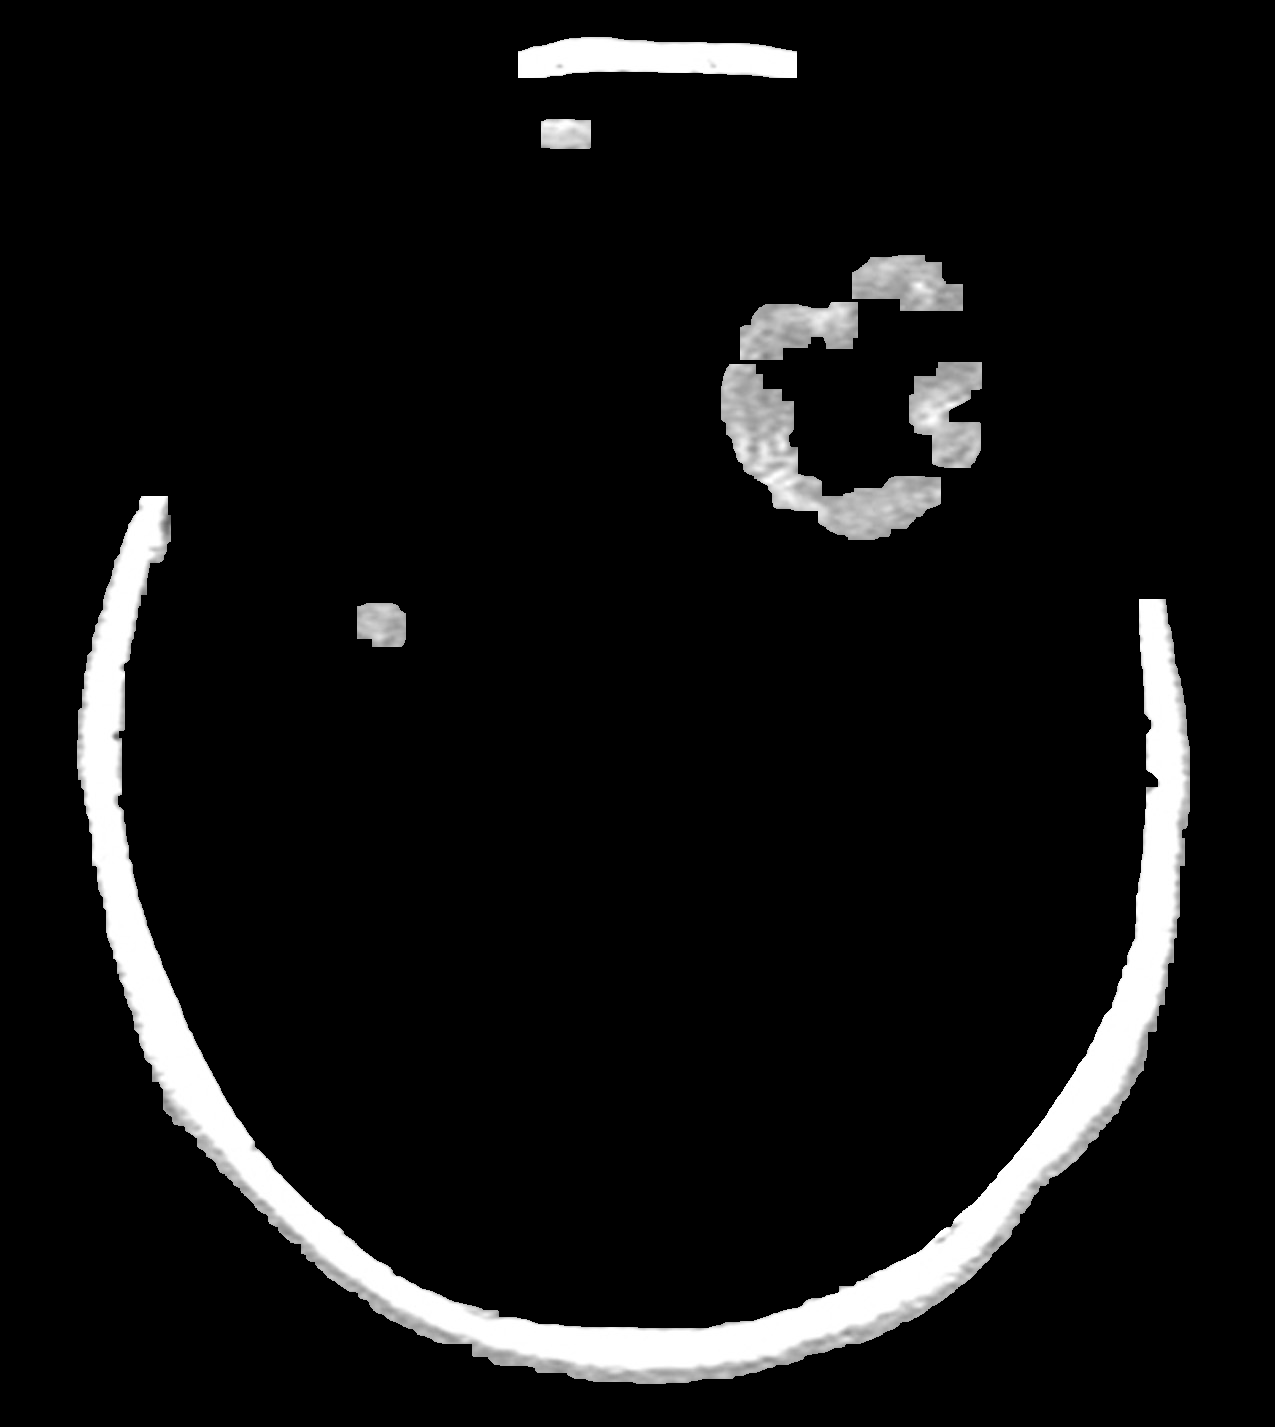

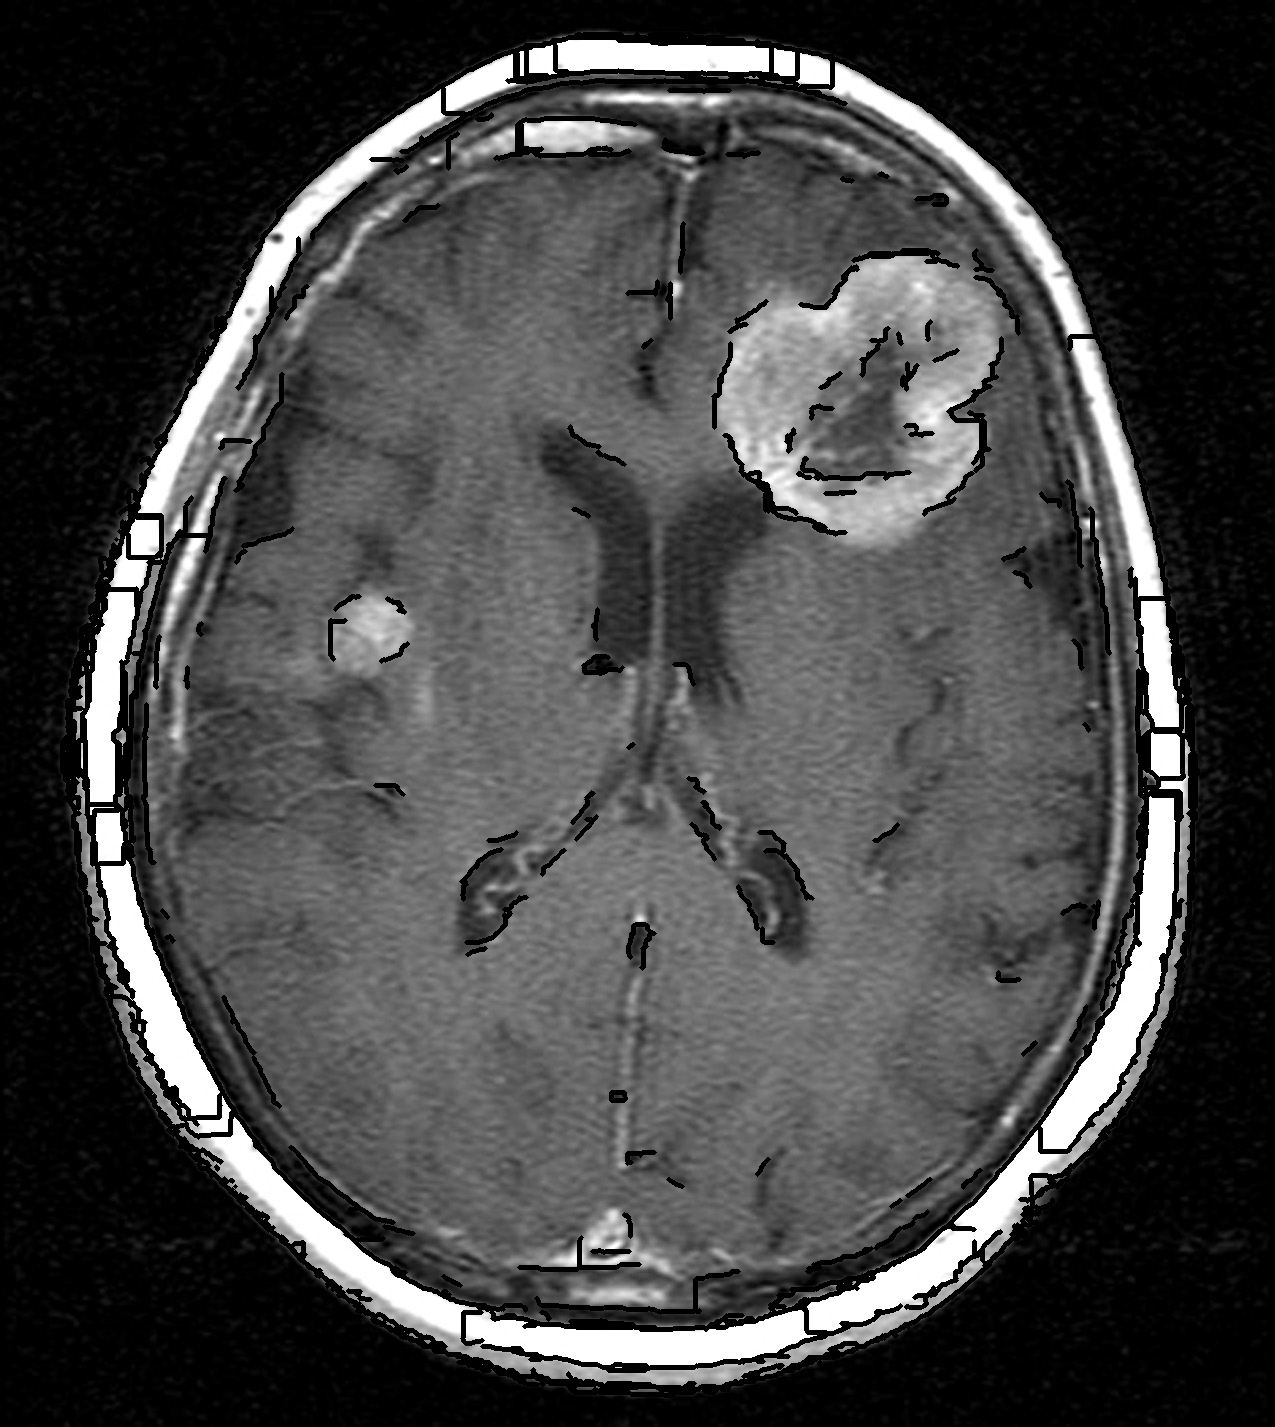

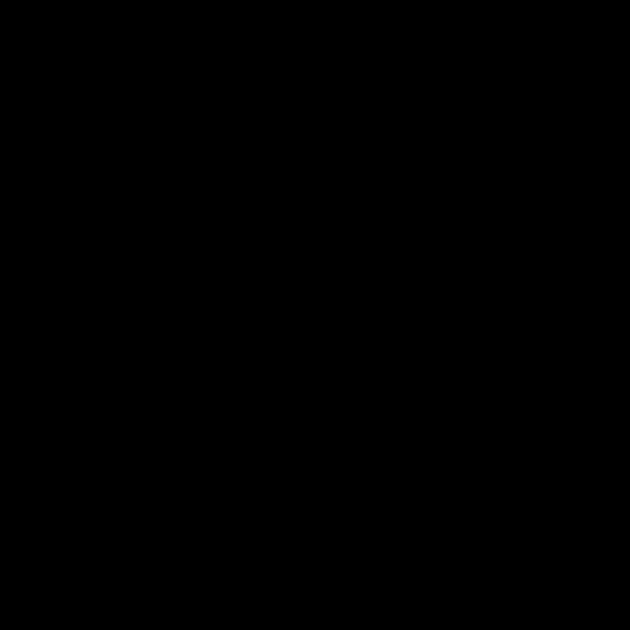

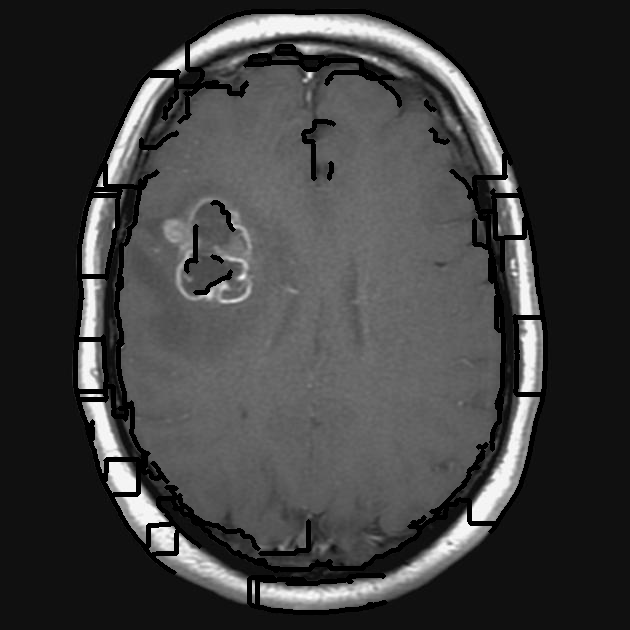

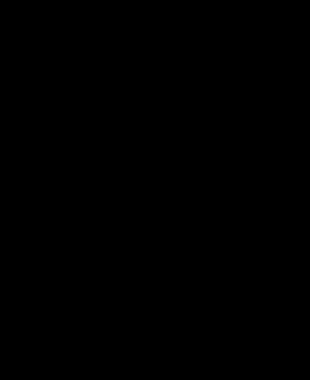

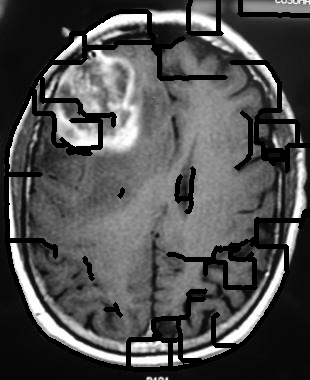

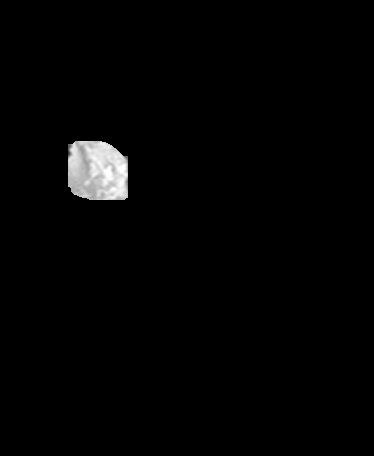

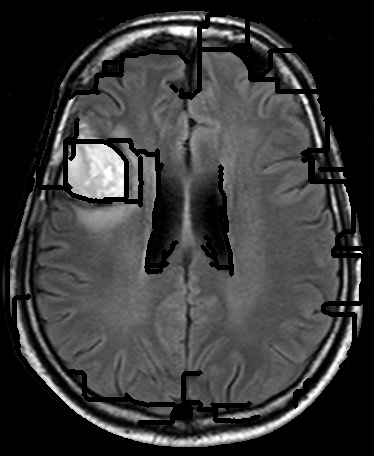

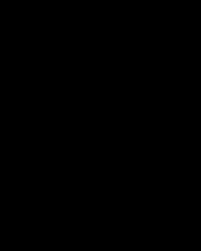

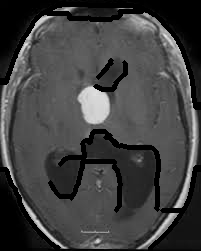

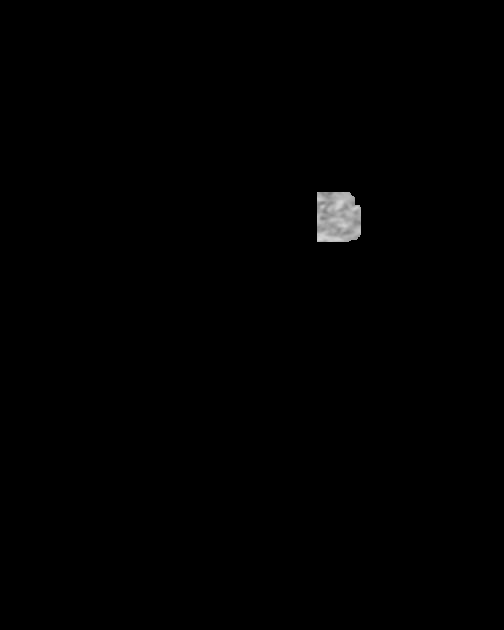

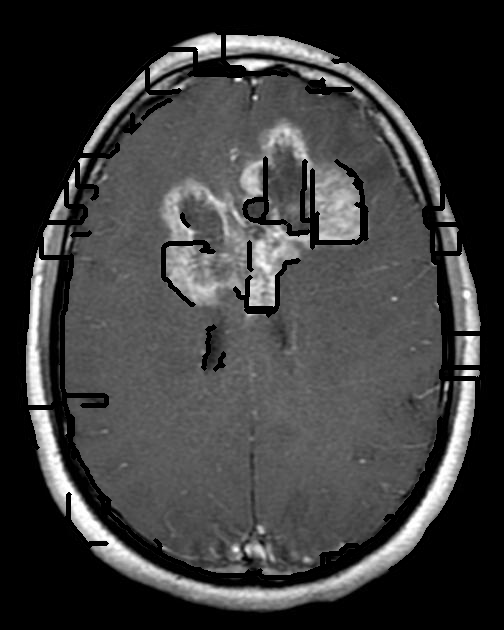

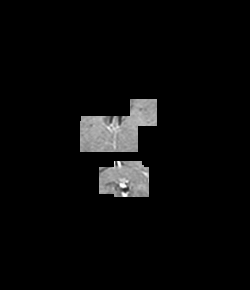

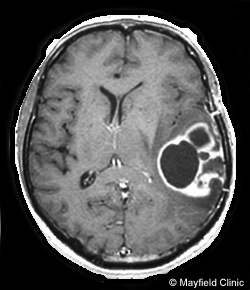

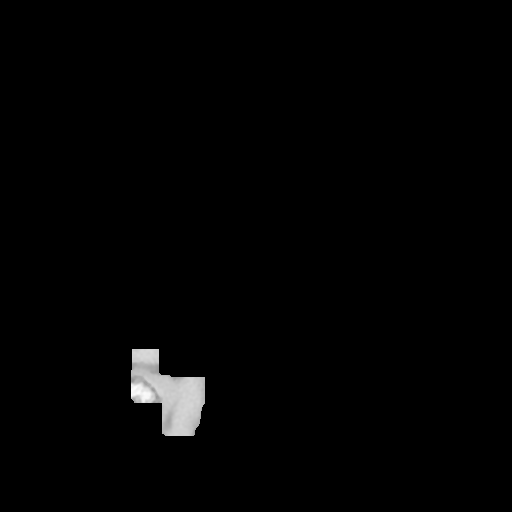

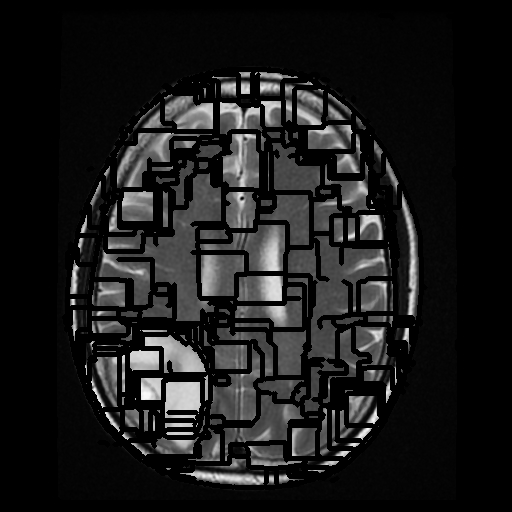

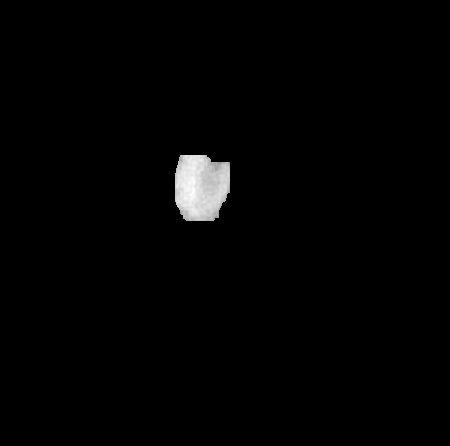

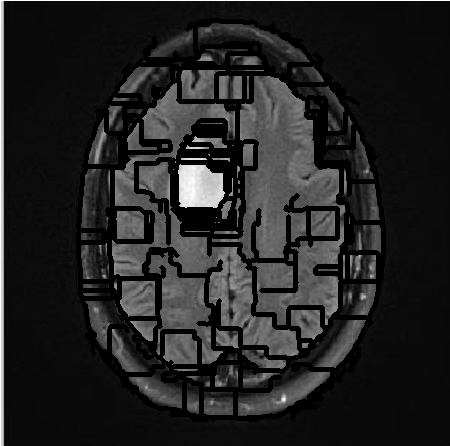

In [11]:
 for fn in glob.glob('/content/drive/MyDrive/Citra_UAS/images/*.jpg'):
  im_gray = cv2.imread(fn, 0)
  # (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  # thresh = 127
  # im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY) [1]
  # cv2_imshow(im_bw)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
  closed = cv2.morphologyEx(im_gray, cv2.MORPH_CLOSE, kernel)
  closed = cv2.erode(closed, None, iterations = 14)
  closed = cv2.dilate(closed, None, iterations = 13)

  ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
# menerapkan dan mengoperasikan thresholding di gambar
  final = cv2.bitwise_and(im_gray,im_gray,mask = mask) 
# plot hasil tresholding
  cv2_imshow(final)
  # cv2_imshow(closed)

  def auto_canny(im_gray, sigma=0.33):
  # mencari median di single channel pixel
    v = np.median(im_gray)
  # menerapkan deteksi tepi cany menggunakan nilai median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(im_gray, lower, upper)
  # mengembalikan dan menampilkan hasil deteksi tepi
    return edged
  canny = auto_canny(closed)
  # cv2_imshow(canny)
  (cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
  cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(im_gray, cnts, -1, (0, 0, 255), 3)
  cv2_imshow(im_gray) 

width: 180 pixels
height: 218 pixels
channels: 3


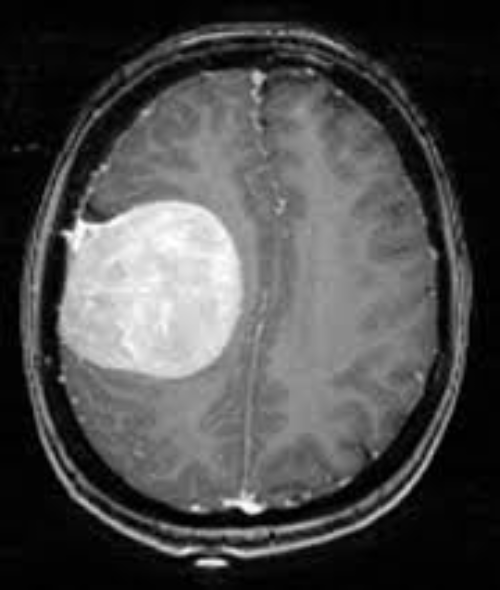

In [27]:
#mencoba mendeteksi tumor 1 images
img_path = "/content/drive/MyDrive/Citra_UAS/images/Y1.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)
cv2_imshow( image)

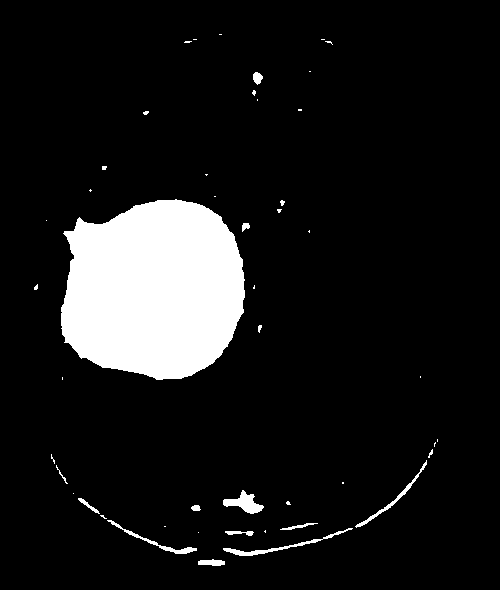

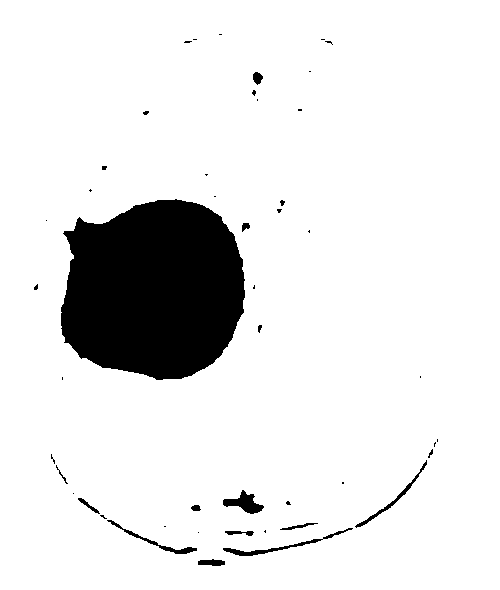

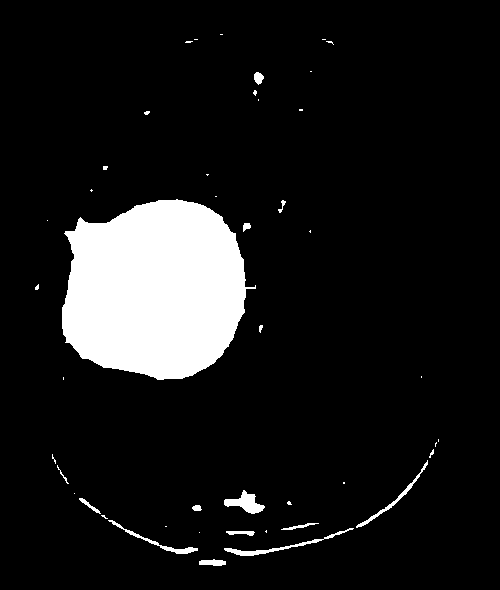

In [21]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
# cv2_imshow(gray)
(T, thresh) = cv2.threshold(image, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(image, 155, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

In [22]:
closed = cv2.erode(closed, None, iterations = 14)
closed = cv2.dilate(closed, None, iterations = 13)

In [23]:
# ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
# #menerapkan dan mengoperasikan thresholding di gambar
# final = cv2.bitwise_and(image,image,mask = mask) 
# #plot hasil tresholding
# cv2_imshow(final)
# ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
# #apply AND operation on image and mask generated by thrresholding
# final = cv2.bitwise_and(image,image,mask = mask) 
# #plot the result
# cv2_imshow(final)

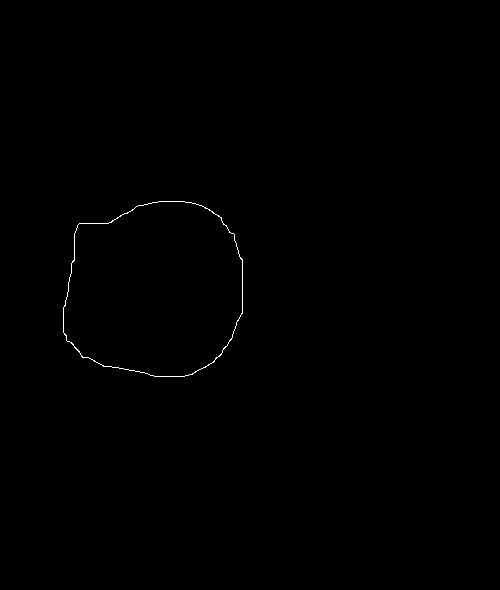

In [24]:
def auto_canny(image, sigma=0.3):
  #mencari median di single channel pixel
  v = np.median(image)
  #menerapkan deteksi tepi cany menggunakan nilai median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  #mengembalikan dan menampilkan hasil deteksi tepi
  return edged
canny = auto_canny(closed)
cv2_imshow(canny)

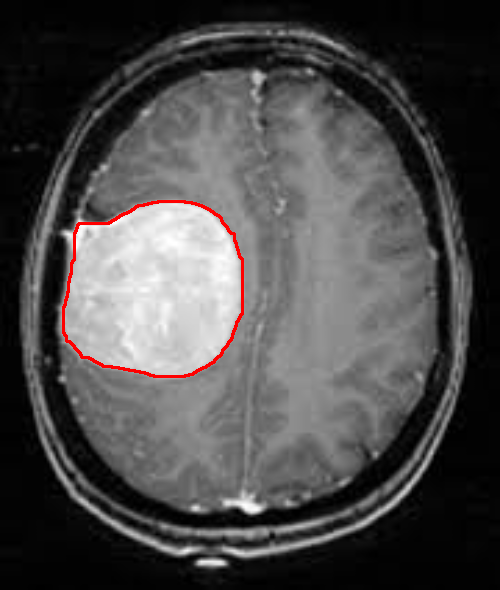

In [25]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
cv2_imshow(image) 